In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from neuralprophet import NeuralProphet

In [43]:
df=pd.read_csv('../combined.csv')
df

,Sail Date.,QTY.(KGS)
0,2018-01-01,257733
1,2018-01-04,577207
2,2018-01-05,1322201
3,2018-01-06,1652038
4,2018-01-07,1548883
...,...,...
1333,2022-12-27,1029546
1334,2022-12-28,971387
1335,2022-12-29,231274
1336,2022-12-30,358590


In [45]:
df['Sail Date.'] = pd.to_datetime(df['Sail Date.'])

df.set_index('Sail Date.', inplace=True)

train_data = df.loc['2018':'2021']

train_data.reset_index(inplace=True)
train_data.columns = ['ds', 'y']

model_np = NeuralProphet()
metrics_train = model_np.fit(train_data, freq='D', epochs=1000)

test_data = df.loc['2022']

test_data.reset_index(inplace=True)
test_data.columns = ['ds', 'y']

forecast = model_np.predict(test_data)

print(forecast.head())

mae = (forecast['yhat1'] - test_data['y']).abs().mean()
mse = ((forecast['yhat1'] - test_data['y']) ** 2).mean()

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - c:\Users\TANU SHREE\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 71.601% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\TANU SHREE\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\TANU SHREE\AppData\Loc

INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (34) is too small than the required number                     for the learning rate finder (226). The results might not be optimal.
Finding best initial lr: 100%|██████████| 226/226 [00:01<00:00, 147.29it/s]


Epoch 1000: 100%|██████████| 1000/1000 [00:00<00:00, 3478.69it/s, loss=0.104, v_num=1, MAE=5.22e+5, RMSE=6.39e+5, Loss=0.102, RegLoss=0.000] 

WARNING - (py.warnings._showwarnmsg) - c:\Users\TANU SHREE\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 70.833% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\TANU SHREE\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\TANU SHREE\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated an


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 181.21it/s]


INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


          ds        y         yhat1        trend  season_yearly  season_weekly
0 2022-01-01  1156612  9.506142e+05  970456.5000   67271.890625  -87114.203125
1 2022-01-02   805926  9.846238e+05  971239.0000   64343.359375  -50958.511719
2 2022-01-04  1497975  1.270557e+06  972803.6250   57582.921875  240170.828125
3 2022-01-08   242431  9.294578e+05  975933.1250   41071.367188  -87546.765625
4 2022-01-09   757974  9.622431e+05  976715.5625   36505.082031  -50977.558594
Mean Absolute Error (MAE): 620209.5071022727
Mean Squared Error (MSE): 575274408749.4248


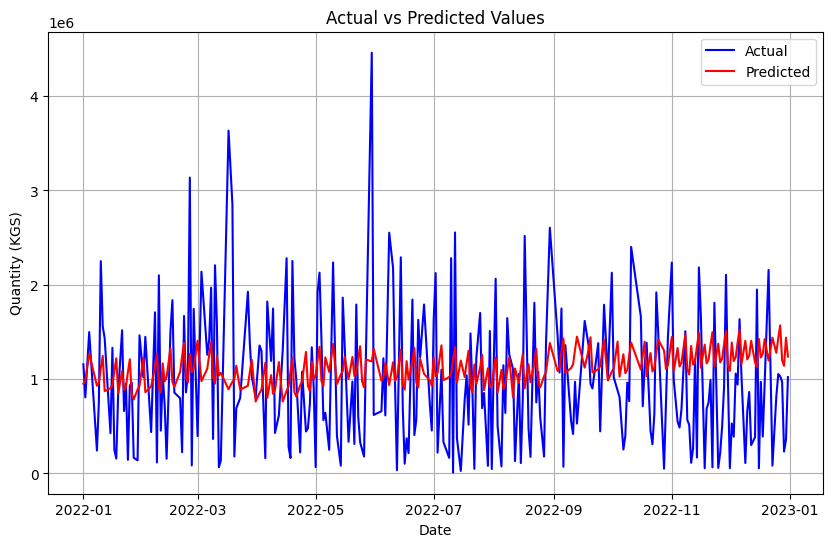

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(test_data['ds'], test_data['y'], label='Actual', color='blue')
plt.plot(forecast['ds'], forecast['yhat1'], label='Predicted', color='red')
plt.title('Actual vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('Quantity (KGS)')
plt.legend()
plt.grid(True)
plt.show()


WARNING - (py.warnings._showwarnmsg) - c:\Users\TANU SHREE\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.726% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\TANU SHREE\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\TANU SHREE\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated an

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 30.40it/s] 

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


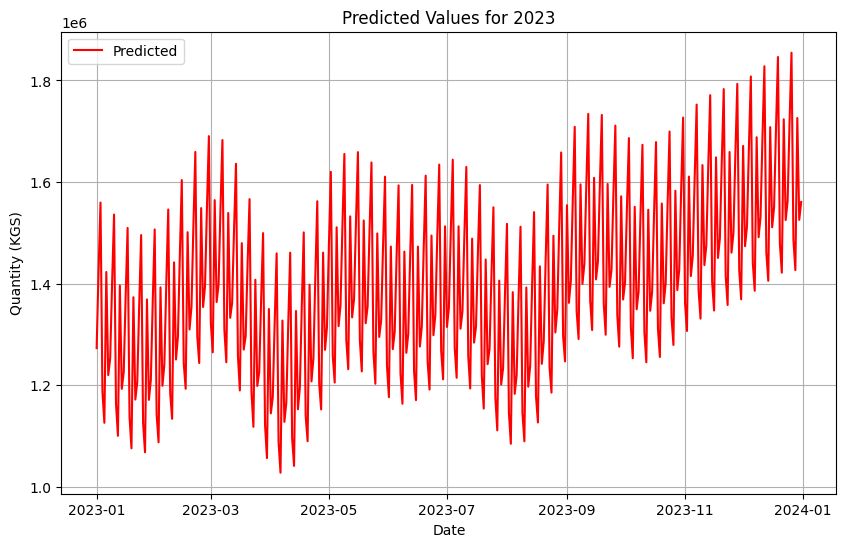

In [49]:
import pandas as pd
dates_2023 = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')

data_2023 = pd.DataFrame({'ds': dates_2023, 'y': [None] * len(dates_2023)})

forecast_2023 = model_np.predict(data_2023)

plt.figure(figsize=(10, 6))
plt.plot(forecast_2023['ds'], forecast_2023['yhat1'], label='Predicted', color='red')
plt.title('Predicted Values for 2023')
plt.xlabel('Date')
plt.ylabel('Quantity (KGS)')
plt.legend()
plt.grid(True)
plt.show()

WARNING - (py.warnings._showwarnmsg) - c:\Users\TANU SHREE\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.727% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\TANU SHREE\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\TANU SHREE\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated an

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 40.92it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


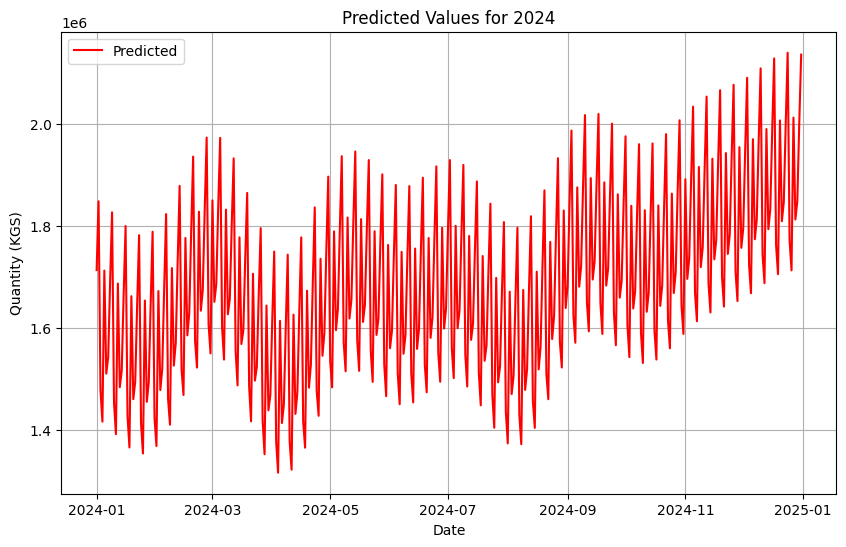

In [50]:
dates_2024 = pd.date_range(start='2024-01-01', end='2024-12-31', freq='D')

data_2024 = pd.DataFrame({'ds': dates_2024, 'y': [None] * len(dates_2024)})

forecast_2024 = model_np.predict(data_2024)

plt.figure(figsize=(10, 6))
plt.plot(forecast_2024['ds'], forecast_2024['yhat1'], label='Predicted', color='red')
plt.title('Predicted Values for 2024')
plt.xlabel('Date')
plt.ylabel('Quantity (KGS)')
plt.legend()
plt.grid(True)
plt.show()